# 1. Definição do problema de negócio

A satisfação do cliente é uma medida fundamental do sucesso de um banco. Clientes
insatisfeitos cancelam seus serviços e raramente expressam sua insatisfação
antes de sair. Clientes satisfeitos, por outro lado, se tornam defensores da marca!

O objetivo deste projeto é **prever se um cliente está satisfeito ou insatisfeito com sua experiência bancária**. Para tal, centenas de recursos anônimos de clientes do Banco Santander disponíveis estão disponíveis em. O modelo apresentado deve apresentar **no minímo 70% de acurácia**. 

Com esses dados, o banco poderia identificar clientes instatisfeitos e tomar medidas proativas para melhorar a felicidade do cliente antes que seja tarde de mais.


# 2. Importando bibliotecas

In [1]:
# Pacotes gerais para manipulação e visualização
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

#Pré processamento
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Machine Learning
from sklearn.ensemble import RandomForestClassifier
import pickle

#Avaliação do modelo
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict #confusion matrix e clas_report requerem previsões
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


# 3. Carregando dados

In [2]:
df = pd.read_csv("train.csv", index_col="ID")

In [3]:
df.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
df.describe().round(2)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.00,76020.00,76020.00,76020.00,76020.00,76020.00,76020.00,76020.00,76020.00,76020.00,...,76020.00,76020.00,76020.00,76020.00,76020.00,76020.00,76020.00,76020.00,76020.00,76020.00
mean,-1523.20,33.21,86.21,72.36,119.53,3.56,6.47,0.41,0.57,3.16,...,7.94,1.37,12.22,8.78,31.51,1.86,76.03,56.61,117235.81,0.04
std,39033.46,12.96,1614.76,339.32,546.27,93.16,153.74,30.60,36.51,95.27,...,455.89,113.96,783.21,538.44,2013.13,147.79,4040.34,2852.58,182664.60,0.19
min,-999999.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5163.75,0.00
25%,2.00,23.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,67870.61,0.00
50%,2.00,28.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,106409.16,0.00
75%,2.00,40.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,118756.25,0.00
max,238.00,105.00,210000.00,12888.03,21024.81,8237.82,11073.57,6600.00,6600.00,8237.82,...,50003.88,20385.72,138831.63,91778.73,438329.22,24650.01,681462.90,397884.30,22034738.76,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76020 entries, 1 to 151838
Columns: 370 entries, var3 to TARGET
dtypes: float64(111), int64(259)
memory usage: 215.2 MB


In [6]:
df.isnull().values.any()

False

- O *dataframe* possui 370 variáveis e 76.020 observações.

- Todos valores estão no formato numérico.

- Não há valores *missing*.

# 4. Pré-processamento

In [7]:
# Separando a variável target das preditoras

X_train = df.drop("TARGET", axis = 1)
y_train = df["TARGET"]

## 4.1 Balancear as classes da variável target

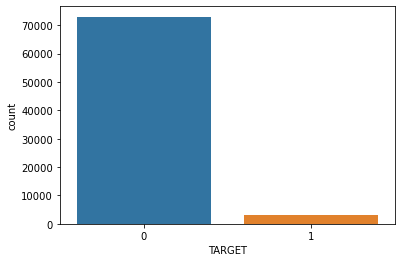

In [8]:
#avaliando variável target

sn.countplot(data = df, x = "TARGET")
plt.show()

Nota-se que as classes 0 (Cliente Satisfeito) e 1 (Cliente não satisfeito) estão desbalanceadas.

Serão geradas novas observações para a classe minoritária a partir do método **SMOTE** (*Synthetic Minority Oversampling Technique*).

In [9]:
oversample = SMOTE()

X_train_SMOTE, y_train_SMOTE = oversample.fit_resample(X_train, y_train)

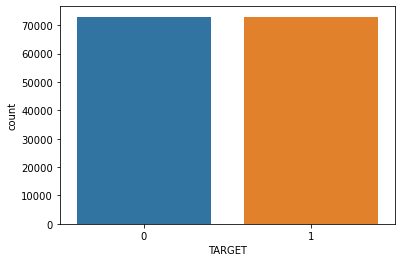

In [10]:
sn.countplot(x = y_train_SMOTE)
plt.show()

Agora as classes estão balanceadas e podemos prosseguir para as próximas etapas de processamento

## 4.2 Redução de dimensionalidade

Como se trata de um conjunto de dados com 370 variáveis as dimensões serão reduzidas em componentes principais usando *Principal Component Analysis* (PCA).

A PCA requer que os dados estejam padronizados. Para isso será utilizado o método *StandardScaler*

In [11]:
#padronizando as variáveis preditoras

scaler = StandardScaler()
X_train_SMOTE_scaled = scaler.fit_transform(X_train_SMOTE)

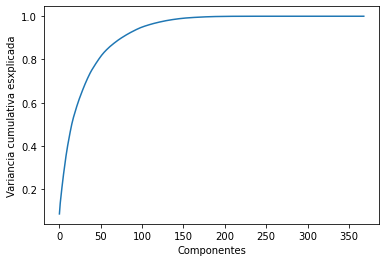

In [12]:
# Definindo o número de componentes

pca = PCA()
pca.fit(X_train_SMOTE_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Componentes")
plt.ylabel("Variancia cumulativa esxplicada")
plt.show()

A partir de aproximadamente 150 componentes a percentagem da variância explicada se estabiliza em cerca de 95.

Assim, as 370 variáveis serão resumidas em 150 componentes pricnipais que explicam 95% da variância presente no *dataframe* original

In [13]:
#Aplicando PCA com numero de componentes definidos

componentes = 150
pca = PCA(n_components=componentes)

X_train_componentes = pca.fit_transform(X_train_SMOTE_scaled)

# 5. Machine Learning

## 5.1 Avaliando acurácia do classificador *Random Forest* com *Cross Validation*

In [14]:
#instanciando objeto da classe RandomForestClassifier
clf = RandomForestClassifier()

In [ ]:
#aplicando cross validation nos dados de treino com Random Forest
scores = cross_val_score(clf, X_train_componentes, y_train_SMOTE, scoring="accuracy", cv = 5)

In [ ]:
scores_mean = (np.mean(scores)*100).round(2)
scores_sd = (np.std(scores)*100).round(2)

In [ ]:
#Salvando scores e sd da cross validation
np.save("scores_cross_val.npy", scores_mean)
np.save("sd_cross_val.npy", scores_sd)

In [15]:
#Carregando scores e sd da cross validation
scores_mean = np.load("scores_cross_val.npy")
scores_sd = np.load("sd_cross_val.npy")

In [16]:
print(f"Acurácia de {scores_mean}% ± {scores_sd}%")

Acurácia de 93.04% ± 1.49%


A primeira versão do modelo com o *Random Forest* apresentou uma acurácia bastante superior ao limiar estabelecido (70%).

## 5.2 Avaliando performance do classificador *Random Forest* com outras métricas

### 5.2.1 *Confusion Matrix*

In [ ]:
# realizando previsões nos dados de treino
y_train_pred = cross_val_predict(clf, X_train_componentes, y_train_SMOTE)

In [ ]:
#salvando previsões
np.save("predict_cross_val.npy", y_train_pred)

In [17]:
#carregando previsões
y_train_pred = np.load("predict_cross_val.npy")

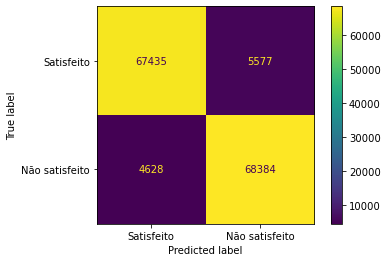

In [19]:
#criando confusion matrix
cm = confusion_matrix(y_train_SMOTE,y_train_pred)

#plotando confusion matrix
display_cm = ConfusionMatrixDisplay(cm, display_labels=["Satisfeito","Não satisfeito"])
display_cm.plot()
plt.show()

Considerando o contexto, os falsos negativos (cliente não satisfeito previsto como satisfeito) são menos desejáveis que os falsos positivos (cliente satisfeito previsto como não satisfeito), pois uma vez que um FN ocorra, não haveria o conhecimento da insatisfação do cliente e nenhuma providencia seria tomada, correndo o risco do banco perdê-lo. Já para os FP, poderia haver uma ação direcionada para um cliente que na verdade já está satisfeito, o que não traraia nenhuma consequencia negativa, pelo contrário iria aumentar a fidelidade do mesmo.

O número de falsos negativos (4628) foi menor que o de falsos positivos (5577). Assim, a proporção reflete o desejado.

Também não há discrepância entre o número de acertos com relação as classes, indicando que o modelo não foi tendencioso.

### 5.2.2 *Classification Report*

In [20]:
print(classification_report(y_train_SMOTE, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     73012
           1       0.92      0.94      0.93     73012

    accuracy                           0.93    146024
   macro avg       0.93      0.93      0.93    146024
weighted avg       0.93      0.93      0.93    146024



A precisão e o recall estão elevados e proximos entre si e o f1-score está próximo a 1.

## 5.3 Treinando o modelo e fazendo previsões nos dados de teste

In [ ]:
#treinando o modelo
final_model = clf.fit(X_train_componentes, y_train_SMOTE)

In [ ]:
# salvando modelo treinado
pickle.dump(final_model, open("final_model.sav", 'wb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

In [ ]:
#carregando modelo treinado
final_model = pickle.load(open("final_model.sav", 'rb'))

In [ ]:
#carregando dataset de teste
X_test = df = pd.read_csv("test.csv", index_col="ID")

### 5.3.1 Pipeline com as mesmas etapas de pré-processamento realizada nos dados de treino

In [ ]:
#definindo pipeline
process = Pipeline([
                    ("padronizacao", scaler),
                    ("PCA", pca)

])


In [ ]:
#aplicando pipeline nos dados de treino
X_test_componentes_padr = process.transform(X_test)

### 5.3.2 Realizando previsões nos dados de teste

In [ ]:
#realizando previsões
y_test_pred = final_model.predict(X_test_componentes_padr)

In [ ]:
final_df = pd.DataFrame(y_test_pred, columns=["Previsões"])

In [ ]:
final_df.replace(to_replace={0:"satisfeito",1:"insatisfeito"}, inplace= True)

In [ ]:
final_df.head()

,Previsões
0,satisfeito
1,satisfeito
2,satisfeito
3,satisfeito
4,satisfeito


In [ ]:
final_df["Previsões"].value_counts()

satisfeito      70128
insatisfeito     5690
Name: Previsões, dtype: int64

In [ ]:
#exportando previsões
final_df.to_csv("Previsões_finais.csv")